In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [307]:
tips_day = tips.groupby("day").mean().reset_index()
display(tips_day)
tips_sex = tips.groupby("sex").mean().reset_index()
display(tips_sex)
tips_smoker = tips.groupby("smoker").mean().reset_index()
display(tips_smoker)
tips_size = tips.groupby("size").mean().reset_index()
display(tips_size)

C:\Users\82104\AppData\Local\Temp\ipykernel_1312\1914506649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_day = tips.groupby("day").mean().reset_index()


,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


C:\Users\82104\AppData\Local\Temp\ipykernel_1312\1914506649.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_sex = tips.groupby("sex").mean().reset_index()


,sex,total_bill,tip,size
0,Male,20.744076,3.089618,2.630573
1,Female,18.056897,2.833448,2.459770


C:\Users\82104\AppData\Local\Temp\ipykernel_1312\1914506649.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_smoker = tips.groupby("smoker").mean().reset_index()


,smoker,total_bill,tip,size
0,Yes,20.756344,3.008710,2.408602
1,No,19.188278,2.991854,2.668874


C:\Users\82104\AppData\Local\Temp\ipykernel_1312\1914506649.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_size = tips.groupby("size").mean().reset_index()


,size,total_bill,tip
0,1,7.242500,1.437500
1,2,16.448013,2.582308
2,3,23.277632,3.393158
3,4,28.613514,4.135405
4,5,30.068000,4.028000
5,6,34.830000,5.225000


In [308]:
# 요일별 평균
def plot_day(ax, zorder = 0):
    # tips_day["day"] : x축, tips_day["tip"] : y축, color : 회색
    # zorder는 막대의 x 좌표를 고정하는 매개변수
    ax.bar(tips_day["day"], tips_day["tip"], color = "lightgray", zorder = zorder)

    # 차트의 제목을 설정하는 코드
    # pad는 제목, 레이블 등과 같은 텍스트 요소와 축 간격을 조절하는 매개변수
    # pad = 12 는 제목과 그림의 상단 경계 간의 간격을 12 포인트로 설정
    ax.set_title("Day Mean", fontsize = 16, pad = 12, fontweight = 'bold')
    ax.title.set_color('red')
    ax.title.set_fontname('Arial')

    ax.set_xticks(tips_day.index) # ax.set_xticks 메소드는 x축의 눈금 위치를 설정하는 메소드
    ax.set_xticklabels(["Thur", "Fri", "Set", "Sun"], fontsize=16, fontweight = 'bold') # x 레이블 지정
    
    # 막대 차트 상단에 해당 막대의 값을 나타내는 텍스트를 추가하는 부분
    h_pad = 0.1 # 텍스트가 막대 위에 위치할 수 있도록 막대 위쪽으로 간격 설정
    for i in range(4): # 각각의 막대에 대한 반복문
        fontweight = "normal" # 일반적인 텍스트 스타일
        color = "k" # 일반적인 텍스트 스타일
        if i == 3: # 주말에 해당하는 막대 텍스트를 굵게 표시, 빨간색으로 표시
            fontweight = "bold"
            color = "darkred"

        # text()를 사용하여 텍스트 추가
        # i는 x축 좌표값, tips_day["tip"].loc[i] + h_pad, y축 좌표값
        # f"{tips_day['tip'].loc[i]:0.2f}" : 소수점 이하 2자리까지 반올림하여 막대의 값을 나타냄
        # horizontalalignment = 'center' : 텍스트를 정렬하는 매개변수, 가로 정렬 방식 (center, left, right)
        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment = 'center', fontsize = 12, fontweight = fontweight, color = color)
    
    # patch : 모양과 색상을 가지는 2차원 도형을 나타내는 객체, patches : patch를 담고 있는 리스트
    # facecolor : patch 객체의 색상을 darkred, edgecolor : 테두리 색상을 black
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # ylim : y축 범위를 설정, y축 범위를 고정
    # y축의 범위를 자동으로 조정해야 할 경우엔 ax.autoscale() 메소드 사용
    ax.set_ylim(0, 4)
    return ax

In [309]:
# 성별 평균
def plot_sex(ax, zorder = 0):
    ax.bar(tips_sex["sex"], tips_sex["tip"], color = "lightgray", zorder = zorder)
    
    ax.set_title("Gender Mean", fontsize = 16, pad = 12, fontweight = 'bold')
    ax.title.set_color('blue')
    ax.title.set_fontname('Arial')

    ax.set_xticks(tips_smoker.index)
    ax.set_xticklabels(["Male", "Female"], fontsize=16, fontweight = 'bold')
    
    # value
    h_pad = 0.1
    for i in range(2):
        fontweight = "normal"
        color = "k"
        if i == 0:
            fontweight = "bold"
            color = "darkblue"

        ax.text(i, tips_sex["tip"].loc[i] + h_pad, f"{tips_sex['tip'].loc[i]:0.2f}",
                horizontalalignment = 'center', fontsize = 16, fontweight = fontweight, color = color)
    
    # Sunday
    ax.patches[0].set_facecolor("darkblue")
    ax.patches[0].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

In [310]:
# 흡연자 비흡연자
def plot_smoker(ax, zorder=0):
    ax.bar(tips_smoker["smoker"], tips_smoker["tip"], color="lightgray", zorder=zorder, label='tip')

    ax.set_title("Smoker Mean", fontsize=16, pad=12, fontweight = 'bold')
    ax.title.set_color('green')
    ax.title.set_fontname('Arial')

    ax.set_xticks(tips_smoker.index)
    ax.set_xticklabels(["Smoke", "No Smoke"], fontsize=16, fontweight = 'bold')
    
    h_pad = 0.1
    for i in range(2):
        fontweight = "normal"
        color = "k"
        if i == 0:
            fontweight = "bold"
            color = "green"

        ax.text(i, tips_smoker["tip"].loc[i] + h_pad, f"{tips_smoker['tip'].loc[i]: .2f}",
                horizontalalignment='center', fontsize=16, fontweight=fontweight, color=color)


    ax.patches[0].set_facecolor("green")
    ax.patches[0].set_edgecolor("black")

    ax.set_ylim(0, 4)
    return ax

In [311]:
# 식사 인원에 따른 평균
def plot_size(ax, zorder=0):
    width = 0.4
    ax.plot(tips_size["size"], tips_size["tip"], color="skyblue", zorder=zorder, marker = 'D', ms = 10, label="Tip", linewidth=4)
    ax.plot(tips_size["size"], tips_size["total_bill"], color="blue", zorder=zorder, marker = 'D', ms = 10, label="Total Bill", linewidth=4)

    ax.set_title("Size Mean", fontsize=16, pad=12, fontweight = 'bold')
    ax.title.set_color('orange')
    ax.title.set_fontname('Arial')
    
    ax.set_xticks(tips_size.index + 1)
    ax.set_xticklabels(["One", "Two", "Three", "Four", "Five", "Six"], fontsize=16, fontweight = 'bold')

    # value
    h_pad = 2
    for i in range(6):
        fontweight = "bold"
        color = "k"
        if i == 5:
            fontweight = "bold"
            color = "red"

        ax.text(i+1-width/2, tips_size["tip"].loc[i] + h_pad, f"{tips_size['tip'].loc[i]: .2f}",
                horizontalalignment='center', fontsize=16, fontweight=fontweight, color=color)

        ax.text(i+0.7+width/2, tips_size["total_bill"].loc[i] + h_pad , f"{tips_size['total_bill'].loc[i]: .2f}",
                horizontalalignment='center', fontsize=16, fontweight=fontweight, color=color)

    # Marker
    ax.plot(6, tips_size.loc[5, "tip"], marker='D', markersize=15, color='red')
    ax.plot(6, tips_size.loc[5, "total_bill"], marker='D', markersize=15, color='red')

    # set_range
    ax.set_ylim(0, 40)
    return ax

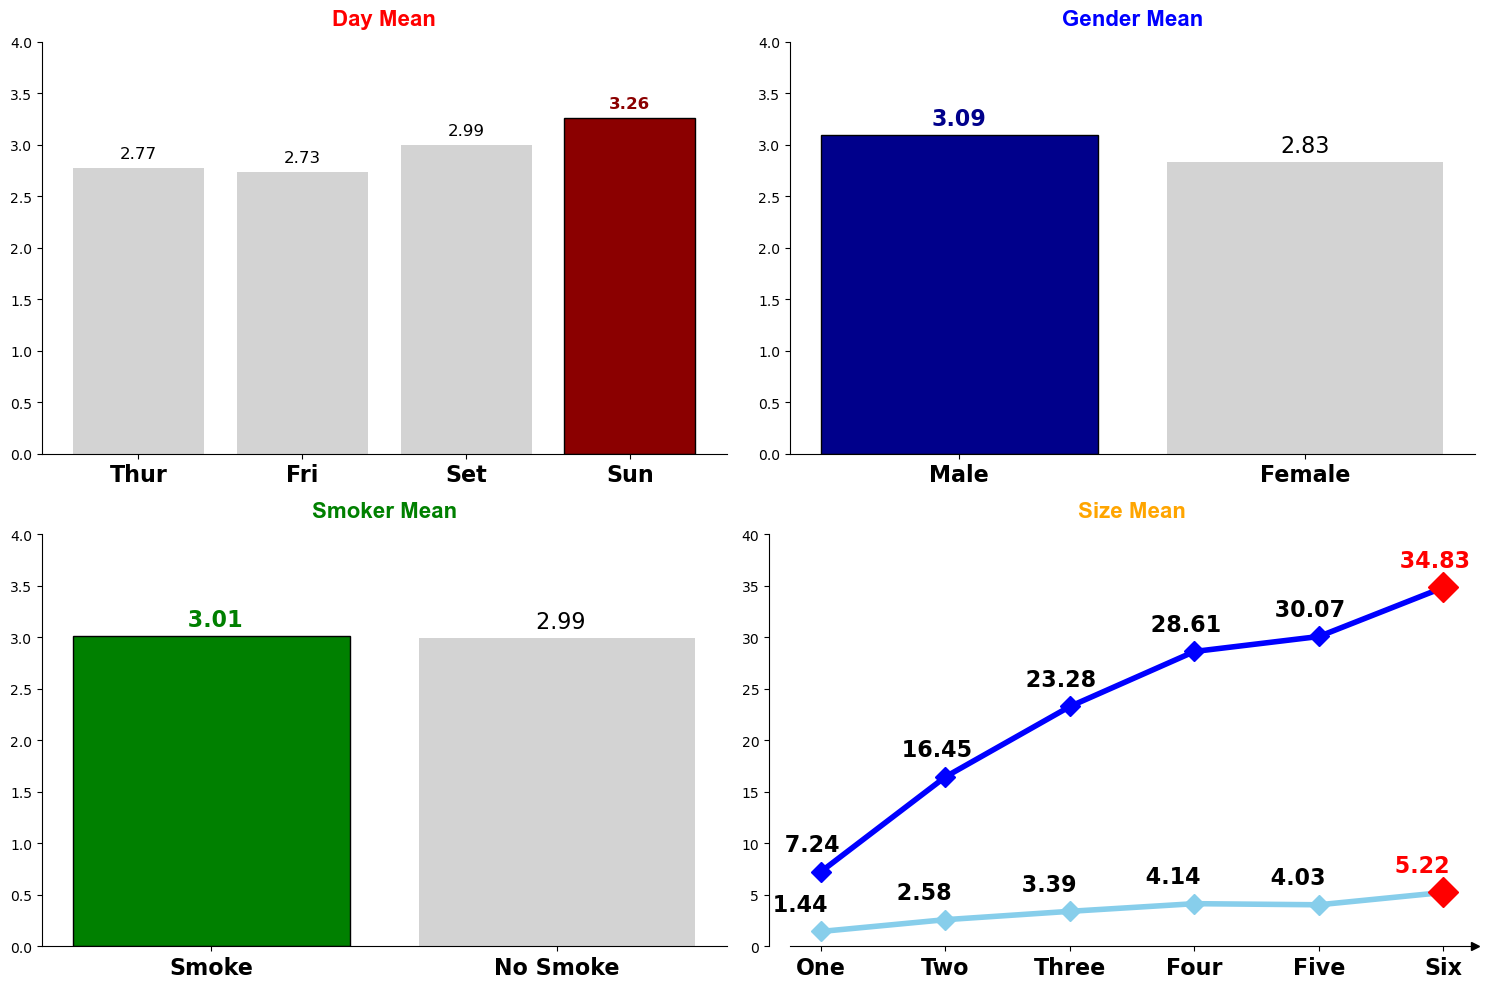

In [312]:
# 시각화
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
ax[0, 0] = plot_day(ax[0, 0], zorder = 2)
ax[0, 1] = plot_sex(ax[0, 1], zorder = 2)
ax[1, 0] = plot_smoker(ax[1, 0], zorder = 2)
ax[1, 1] = plot_size(ax[1, 1], zorder = 2)

ax[0, 0].spines["top"].set_visible(False)
ax[0, 0].spines["right"].set_visible(False)
ax[0, 1].spines["top"].set_visible(False)
ax[0, 1].spines["right"].set_visible(False)
ax[1, 0].spines["top"].set_visible(False)
ax[1, 0].spines["right"].set_visible(False)
ax[1, 1].spines["top"].set_visible(False)
ax[1, 1].spines["right"].set_visible(False)

ax[1, 1].plot(1, 0, ">k", transform=ax[1, 1].get_yaxis_transform(), clip_on=False)
ax[1, 1].spines["left"].set_position(("outward", 15))

plt.tight_layout()
plt.show()